#  *Beginner Level Task 3*
Objective: *Music Recommendation*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
Train   =   pd.read_csv('train.csv')
Test    =   pd.read_csv('test.csv')
Members =   pd.read_csv('members.csv')
Songs   =   pd.read_csv('songs.csv')
Sample =   pd.read_csv('sample_submission.csv')
Song_extra =  pd.read_csv ('song_extra_info.csv')

In [3]:
Train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
Test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [5]:
Songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [6]:
Members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [7]:
Sample.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [8]:
Song_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [9]:
Train = Train.sample(frac=0.01)
Train = pd.merge(Train, Songs, on='song_id', how='left')
Train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,QW/+uLOcUz29J7FHPmdbMm1FHbFAD2azQ/W4c/Z13NU=,ZhZC1hAjy0ckyh61YKdRPY9YELemUSgXQHnoNpgyuEE=,discover,Album more,album,0,NaN,NaN,NaN,NaN,NaN,NaN
1,rfDGYIP0P1kRB5S8SSY8qPZYZz/YGfxETNjv2CIkU+Q=,jXxtxJJKLZum6IVu7jQoOAyoQfGJPQ47T6MzXZvxmhE=,my library,Local playlist more,local-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN
2,G3RCMS1yfcGH1zQ/8Ow6PGgGCrouygQ/bBRTjYw4FGY=,QCe2dGbEr/mtcsZiGeRH7KIeCc/mQIMd+1lB6z8DB/c=,my library,Local playlist more,local-library,0,235833.0,458,周杰倫 (Jay Chou),周杰倫,周杰倫,3.0
3,3psgxDUk5MbWBx1OBznTUafduIg3Q+gz5YlDepZfAr4=,1TdBY/DmTrSCJd8kp3Z67DDXhn+LnmDMVEzLZVD9ErM=,my library,Local playlist more,local-playlist,1,257784.0,458,鍾漢良 (Wallace Chung),陳迪匡,李安修,3.0
4,TOOdu+cNaCfVvdw8ClVB94j+wql0Z+HqYOh7R4dSQJU=,ASlotpA6JD8TRjfEyosUzXLnaQjcFeho7jFxgIlnRmM=,discover,Online playlist more,online-playlist,1,334236.0,1609,JUSTICE,Gaspard Augé| Xavier de Rosnay,M. Yaman,52.0


In [10]:
Train = pd.merge(Train, Members, on='msno', how='left')
Train.shape

(10486, 18)

In [11]:
len(Train),len(Test),len(Members),len(Songs),len(Sample),len(Song_extra)

(10486, 1048575, 34403, 1048575, 1048575, 1048575)

In [12]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10486 entries, 0 to 10485
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   msno                    10486 non-null  object 
 1   song_id                 10486 non-null  object 
 2   source_system_tab       10452 non-null  object 
 3   source_screen_name      10022 non-null  object 
 4   source_type             10456 non-null  object 
 5   target                  10486 non-null  int64  
 6   song_length             8696 non-null   float64
 7   genre_ids               8565 non-null   object 
 8   artist_name             8696 non-null   object 
 9   composer                6842 non-null   object 
 10  lyricist                5192 non-null   object 
 11  language                8696 non-null   float64
 12  city                    10486 non-null  int64  
 13  bd                      10486 non-null  int64  
 14  gender                  6297 non-null 

In [13]:
null_check = Train.isnull()
print((null_check.sum()/null_check.count())*100)

msno                       0.000000
song_id                    0.000000
source_system_tab          0.324242
source_screen_name         4.424948
source_type                0.286096
target                     0.000000
song_length               17.070380
genre_ids                 18.319664
artist_name               17.070380
composer                  34.751097
lyricist                  50.486363
language                  17.070380
city                       0.000000
bd                         0.000000
gender                    39.948503
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64


In [14]:
for i in Train.select_dtypes(include=['object']).columns:
    Train[i][Train[i].isnull()] = 'unknown'
    
Train = Train.fillna(value=0)
Train.head()

<ipython-input-14-56a87dfc7ea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train[i][Train[i].isnull()] = 'unknown'


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,QW/+uLOcUz29J7FHPmdbMm1FHbFAD2azQ/W4c/Z13NU=,ZhZC1hAjy0ckyh61YKdRPY9YELemUSgXQHnoNpgyuEE=,discover,Album more,album,0,0.0,unknown,unknown,unknown,unknown,0.0,13,30,male,7,20110722,20171006
1,rfDGYIP0P1kRB5S8SSY8qPZYZz/YGfxETNjv2CIkU+Q=,jXxtxJJKLZum6IVu7jQoOAyoQfGJPQ47T6MzXZvxmhE=,my library,Local playlist more,local-playlist,1,0.0,unknown,unknown,unknown,unknown,0.0,14,27,female,9,20101224,20170607
2,G3RCMS1yfcGH1zQ/8Ow6PGgGCrouygQ/bBRTjYw4FGY=,QCe2dGbEr/mtcsZiGeRH7KIeCc/mQIMd+1lB6z8DB/c=,my library,Local playlist more,local-library,0,235833.0,458,周杰倫 (Jay Chou),周杰倫,周杰倫,3.0,22,0,female,9,20141202,20170324
3,3psgxDUk5MbWBx1OBznTUafduIg3Q+gz5YlDepZfAr4=,1TdBY/DmTrSCJd8kp3Z67DDXhn+LnmDMVEzLZVD9ErM=,my library,Local playlist more,local-playlist,1,257784.0,458,鍾漢良 (Wallace Chung),陳迪匡,李安修,3.0,21,32,male,9,20070712,20180317
4,TOOdu+cNaCfVvdw8ClVB94j+wql0Z+HqYOh7R4dSQJU=,ASlotpA6JD8TRjfEyosUzXLnaQjcFeho7jFxgIlnRmM=,discover,Online playlist more,online-playlist,1,334236.0,1609,JUSTICE,Gaspard Augé| Xavier de Rosnay,M. Yaman,52.0,1,0,unknown,7,20110816,20171002


In [15]:
for col in Train.select_dtypes(include=['object']).columns:
    Train[col] = Train[col].astype('category')
for i in Train.select_dtypes(include=['category']).columns:
    Train[i] = Train[i].cat.codes
from sklearn.model_selection import train_test_split
X_train = Train.drop(['target'], axis = 1).values
y_train = Train['target'].values
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.30)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=250)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 391  562]
 [ 262 1931]]


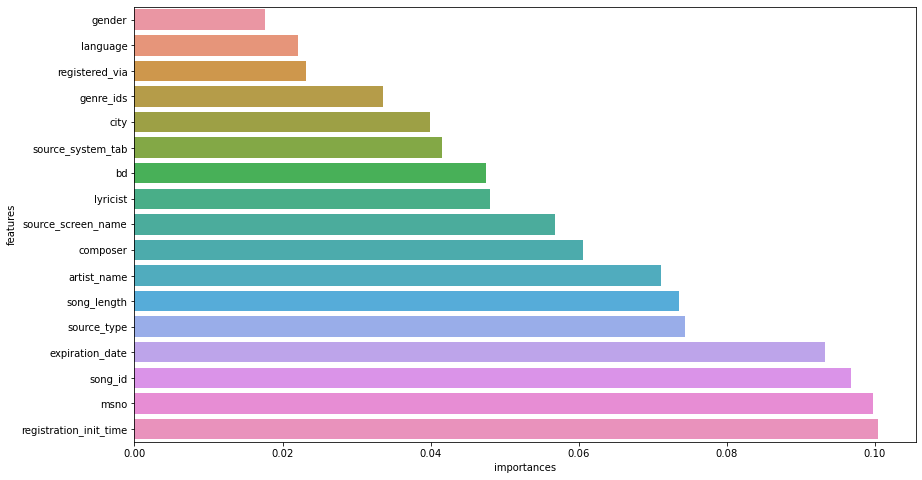

In [17]:
Train_plot = pd.DataFrame({'features': Train.columns[Train.columns != 'target'],
                        'importances': rfc.feature_importances_})
Train_plot = Train_plot.sort_values('importances', ascending=True)

plt.figure(figsize=[14,8])
sns.barplot(x = Train_plot.importances, y = Train_plot.features)
plt.show()

In [18]:
tr = 6000
ts = 4000
data_path = r"train.csv"
Train = pd.read_csv(data_path,nrows=tr)
Names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
Test1 = pd.read_csv(data_path,names=Names,skiprows=tr,nrows=ts)
Songs = pd.read_csv(r"songs.csv")
Members = pd.read_csv(r"members.csv")

In [19]:
Train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [20]:
Train.sample(20)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
2710,92/X35EpuIbhYypRay4MAUdwM9m8Kl1edFl2Zi/wbyM=,9Xxvd9J4SpEakcmoYTvt+ekTW15btrc+DKumBSTJZU0=,my library,Local playlist more,local-library,1
1914,y+G0kdNtxJDgiaOno5Lu8eMVdrtMuLafaQU/zFgPnoA=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,my library,Local playlist more,local-playlist,1
345,mWeiJ5V5cn+BQKvjKJHIzh4YJpH2gLiK/3ZdakW6x20=,wa6Fa5oHdhUlYV6BTABU+RIkJ3qztKJvuYTaX2HMLzw=,my library,My library,local-playlist,1
5931,geIZh6vRhAxAoSW44ccURiXwBSBCKzPyQ0bj8bEouH4=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,my library,Local playlist more,local-library,1
1415,anGkSmflouVeIvfJe5/gV8jNy3ItMVtX858cibL8CTQ=,aeL41rjbueg1lVWksj9ZayWbywf3cr0D29af9JmQrfE=,my library,Album more,album,1
3146,ULaS7iTeNVqlI45nQEFyye+QRhPy1TvABDDu8AXool0=,c2bp6xlq7o3Pj6x95ddX67S/wGsP6qPN/8PqM1DL0a8=,my library,Local playlist more,local-library,1
2341,67rPKrvEGak0BS4XRPmQSCSWDw85Vt6EFza1YeJOOco=,bKKSf7VtmURgMT5bCDl1FJE8ToKbXdmRjkHimHszqhw=,my library,Local playlist more,local-library,1
4524,rdQG6oXS0KGhcE17cX4txxnIcxRtIey27A4ohC2bczs=,MFPjIaT0PEycUUGrql3P1ww06+vCXCvzH2LZFxD+DjU=,my library,Local playlist more,local-library,1
5459,iPSPdLEqEnjQCTFCmdzxWDaoP8G9m7A55xFiK/9ft1c=,sVcmZuUb/ACJh4QM1m/fW8IHObp2aauU+A7dA+B2FOs=,my library,Local playlist more,local-library,1
4298,wkgVJmHB4Ph44npptigdhK/OSHv37calS3ydn9/rlfA=,QD4a1I68SDSNd108BzHUtZppX4EQ4nJ6rNPuhkSVnAQ=,my library,Local playlist more,local-library,1


In [21]:
Train.shape,Test1.shape,Songs.shape,Members.shape

((6000, 6), (4000, 6), (1048575, 7), (34403, 7))

In [22]:
Train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [23]:
Train.describe(),Test1.describe(),Songs.describe(),Members.describe()

(            target
 count  6000.000000
 mean      0.787333
 std       0.409228
 min       0.000000
 25%       1.000000
 50%       1.000000
 75%       1.000000
 max       1.000000,
             target
 count  4000.000000
 mean      0.751750
 std       0.432052
 min       0.000000
 25%       1.000000
 50%       1.000000
 75%       1.000000
 max       1.000000,
         song_length      language
 count  1.048575e+06  1.048574e+06
 mean   2.476199e+05  3.117676e+01
 std    1.555091e+05  2.417372e+01
 min    1.850000e+02 -1.000000e+00
 25%    1.884530e+05 -1.000000e+00
 50%    2.289370e+05  5.200000e+01
 75%    2.763170e+05  5.200000e+01
 max    1.217385e+07  5.900000e+01,
                city            bd  registered_via  registration_init_time  \
 count  34403.000000  34403.000000    34403.000000            3.440300e+04   
 mean       5.371276     12.280935        5.953376            2.013994e+07   
 std        6.243929     18.170251        2.287534            2.954015e+04   
 min      

In [24]:
Train.info(),Test1.info(),Songs.info(),Members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                6000 non-null   object
 1   song_id             6000 non-null   object
 2   source_system_tab   5986 non-null   object
 3   source_screen_name  5834 non-null   object
 4   source_type         5986 non-null   object
 5   target              6000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 281.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                4000 non-null   object
 1   song_id             4000 non-null   object
 2   source_system_tab   3994 non-null   object
 3   source_screen_name  3902 non-null   object
 4   source_type         3994 non-null   object
 5   target     

(None, None, None, None)

In [25]:
Train.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    166
source_type            14
target                  0
dtype: int64

In [26]:
Test1.isnull().sum()

msno                   0
song_id                0
source_system_tab      6
source_screen_name    98
source_type            6
target                 0
dtype: int64

In [27]:
Songs.isnull().sum()

song_id             0
song_length         0
genre_ids       37276
artist_name         0
composer       478021
lyricist       860209
language            1
dtype: int64

In [28]:
Members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

# *Data Visualization*

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

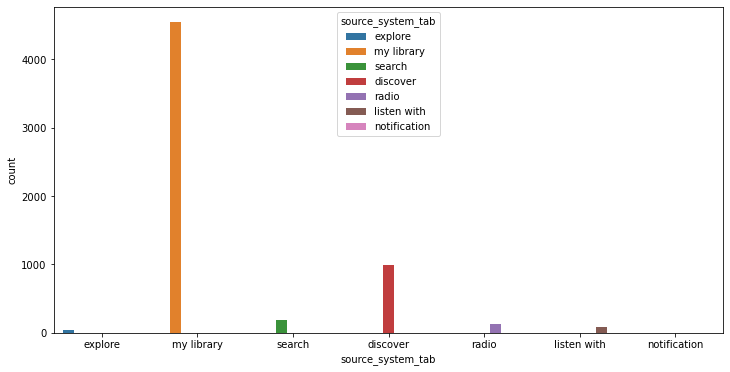

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x = Train['source_system_tab'],hue=Train['source_system_tab'])

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

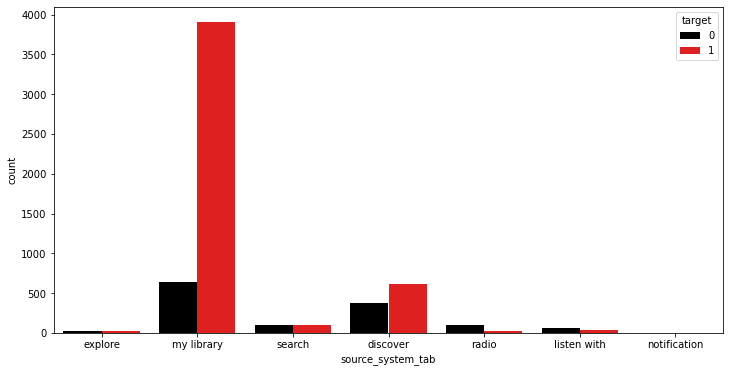

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x = Train['source_system_tab'],palette=['black','red'],hue=Train['target'])

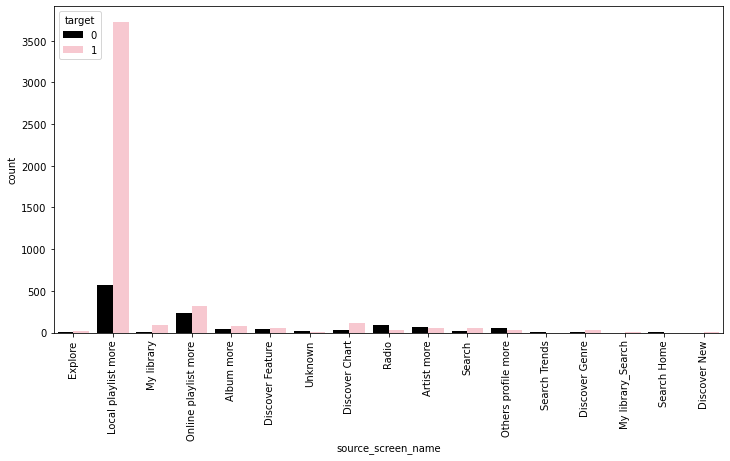

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x = Train['source_screen_name'],palette=['black','pink'],hue=Train['target'],data = Train,orient='v')
plt.xticks(rotation =90)
plt.show()

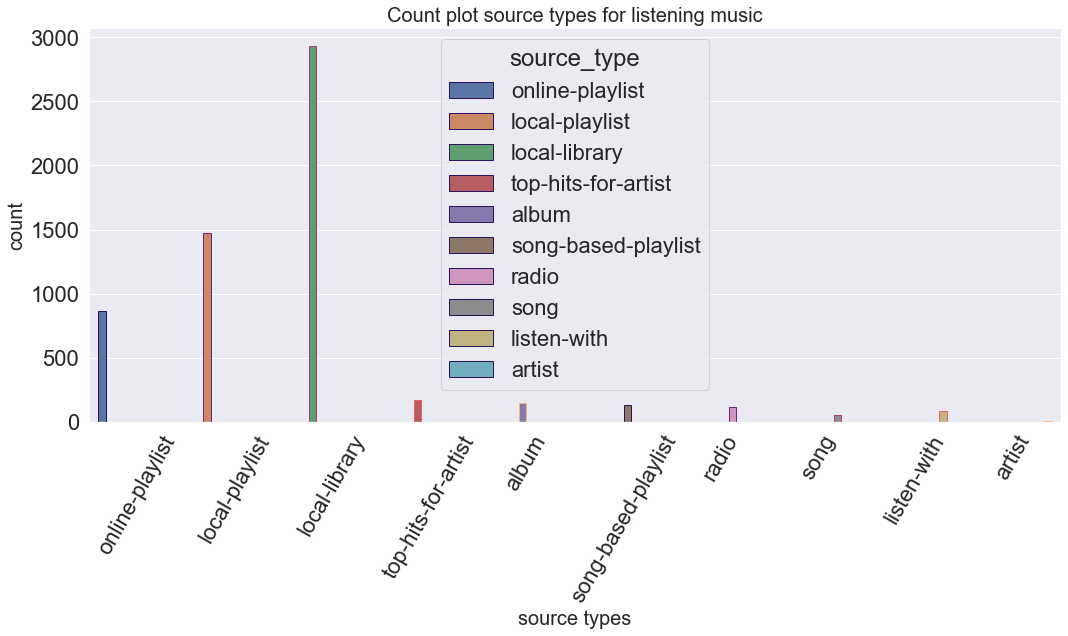

In [32]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=Train,edgecolor=sns.color_palette('magma',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='60')
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()

In [33]:
def count_plot(data, x, hue, type):
  plt.figure(figsize = (15, 8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.tight_layout()

 Function to plot histograms for categories

In [34]:
def count_plot_function(data, x):
  plt.figure(figsize = (15,10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data)
  plt.xlabel(x, fontsize = 30)
  plt.ylabel('count', fontsize = 30)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 30)
  plt.tight_layout()

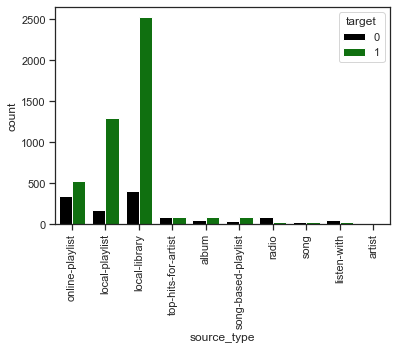

In [35]:
sns.countplot(x = Train['source_type'],palette=['black','green'],hue=Train['target'],data = Train,orient='v')
plt.xticks(rotation =90)
plt.show()

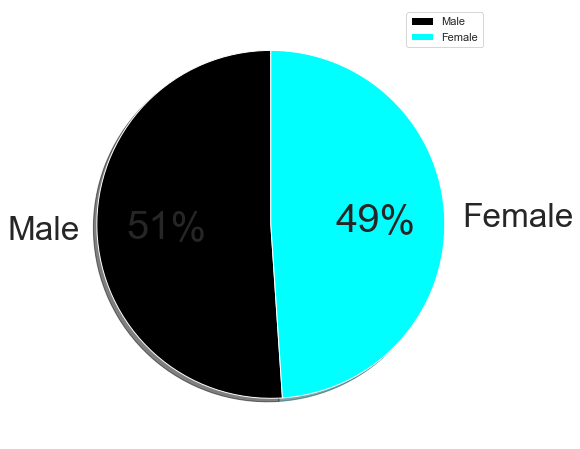

In [36]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['black','cyan']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(Members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

<AxesSubplot:xlabel='language', ylabel='count'>

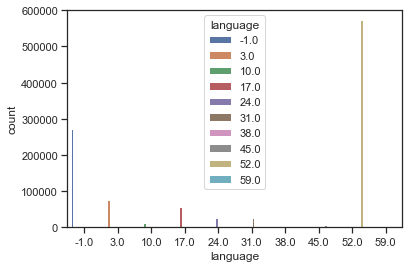

In [37]:
sns.countplot(x = Songs['language'],data =Train,hue=Songs['language'],orient='v')

(None, None)

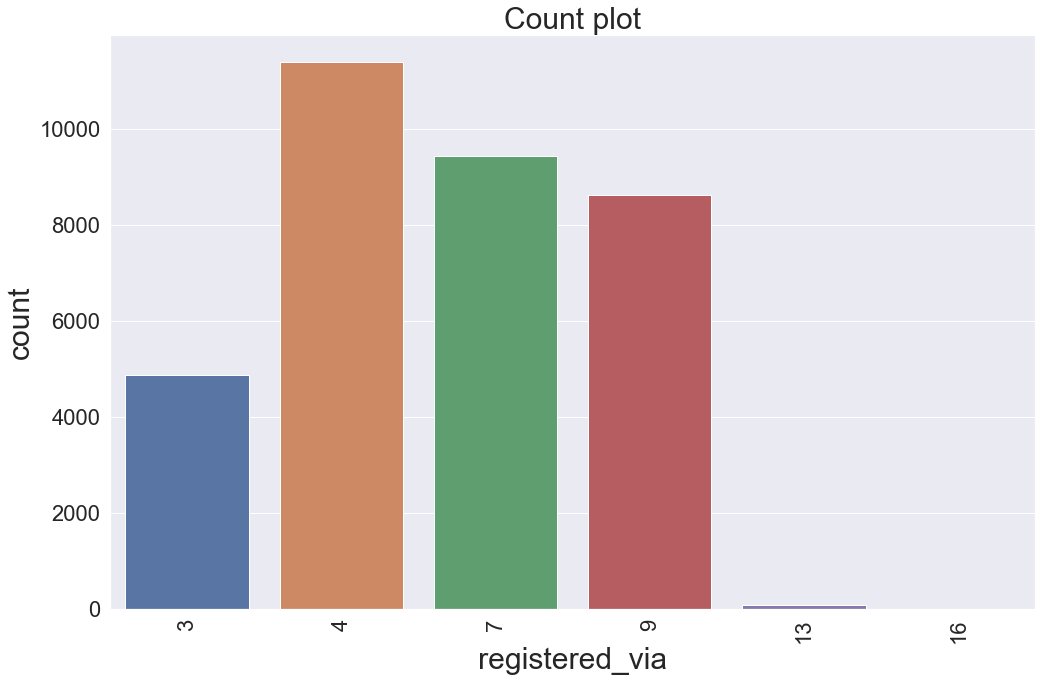

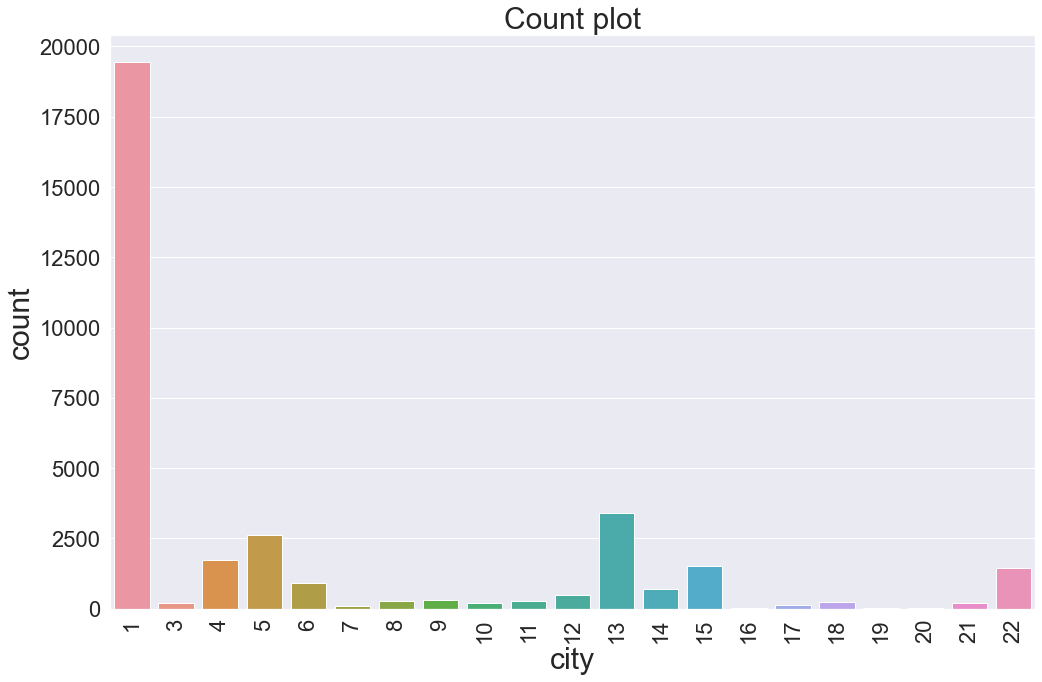

In [38]:
count_plot_function(Members, 'registered_via'),count_plot_function(Members, 'city')

C:\Users\7024d\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for Registration')

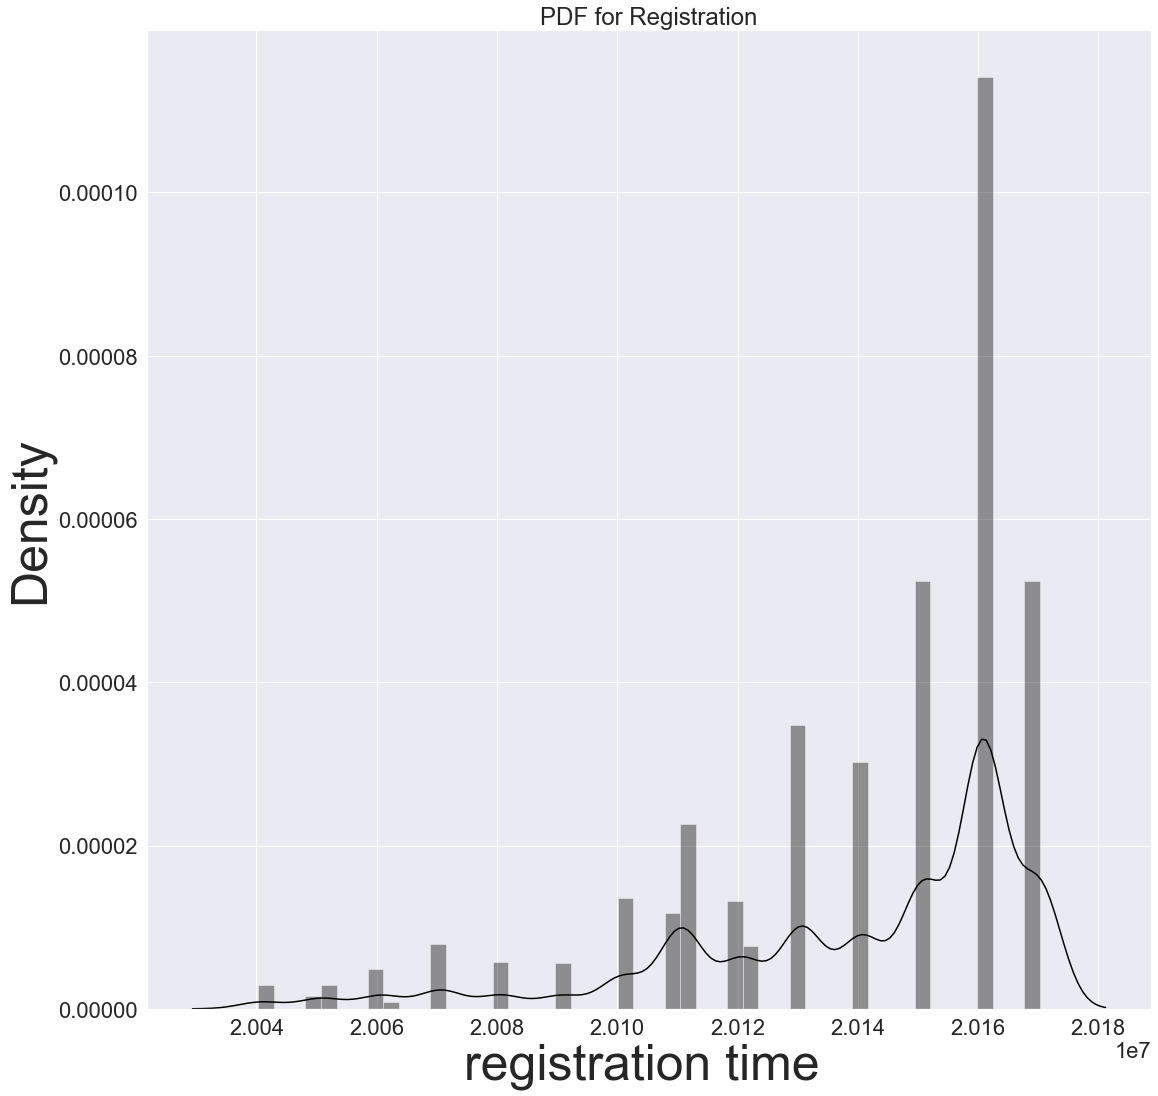

In [39]:
plt.figure(figsize = (18, 18)) 
sns.distplot(Members.registration_init_time,color='black')
sns.set(font_scale=2)
plt.ylabel('Density',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)
plt.title('PDF for Registration')

Function to plot PDF and CDf.

C:\Users\7024d\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


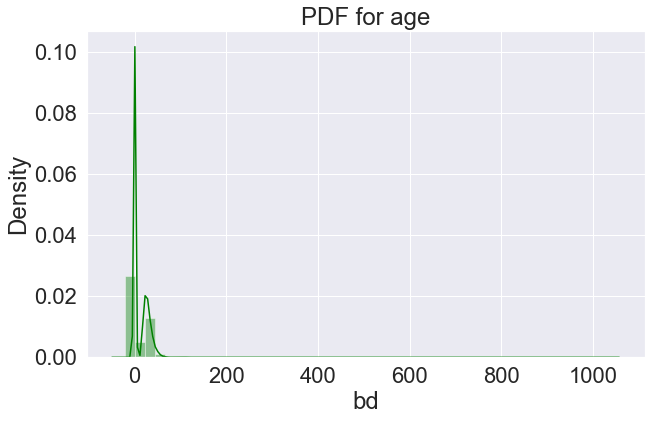

In [40]:
def plot_pdf_cdf(x, flag):
  plt.figure(figsize = (10, 6)) 
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='green')
    plt.title('CDF for age')
  else:
    sns.distplot(x,color='green')
    plt.title('PDF for age')
  sns.set(font_scale=2)
plot_pdf_cdf(Members['bd'], False)

In [41]:
np.percentile(Members['bd'].values, 98)

47.0

# *Data Preprocessing & Cleaning*

In [44]:
test = Test1.drop(['target'],axis=1)
ytr = np.array(Test1['target'])
test_name = ['id','msno','song_id','source_system_tab',\
             'source_screen_name','source_type']
test['id']=np.arange(ts)
test = test[test_name]
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
Train = Train.merge(Songs[song_cols], on='song_id', how='left')
test = test.merge(Songs[song_cols], on='song_id', how='left')
Members['registration_year'] = Members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
Members['registration_month'] = Members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
Members['registration_date'] = Members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))
Members['expiration_year'] = Members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
Members['expiration_month'] = Members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
Members['expiration_date'] = Members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
Members = Members.drop(['registration_init_time'], axis=1)
Members_cols = Members.columns
Train = Train.merge(Members[Members_cols], on='msno', how='left')
Test = test.merge(Members[Members_cols], on='msno', how='left')
Train = train.fillna(-1)
Test = test.fillna(-1)

In [50]:
import gc
del Members, Songs; gc.collect();
colm = list(Train.columns)
colm.remove('target')
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])


100%|█████████████████████████████████████████████| 19/19 [00:00<00:00, 304.99it/s]


*Model Buidling*

In [51]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

X = np.array(Train.drop(['target'], axis=1))
y = Train['target'].values

X_test = np.array(Test.drop(['id'], axis=1))
ids = Test['id'].values

del Train, Test; gc.collect();
X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12) 

del X, y; gc.collect();
d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 
watchlist = [d_train, d_valid]

Basic Classification Models

In [52]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [53]:
predict(LogisticRegression())

Training Score : 0.784643643675435
Accuracy on test data for the model 75.4


In [54]:
predict(RandomForestClassifier())

Training Score : 1.0
Accuracy on test data for the model 78.9


Prediction using Lightgbm

In [55]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

Training until validation scores don't improve for 10 rounds.
[10]	training's auc: 0.994299	valid_1's auc: 0.830352
Early stopping, best iteration is:
[6]	training's auc: 0.979507	valid_1's auc: 0.841545


In [56]:
p_test = model1.predict(X_test)

In [57]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))